In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = r'C:\Users\user\Documents\Data Analytics Path\DSTI\Pthyton and Machine Leaning Lab\Project 1\Project 1\books.v3.2.dropped_columns.xlsx'
df = pd.read_excel(file_path)

In [4]:
df.head(10)


,bookID,authors,average_rating,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,12224,Sam Bass Warner,3.58,9780674842113,en-US,236,61,6,38097,Harvard University Press
1,16914,David E. Smith (Turgon of TheOneRing.net,3.58,9781593600112,eng,400,26,4,38083,Cold Spring Press
2,26012,Bret Easton Ellis,3.46,9782264031914,fre,537,56,5,36937,2018-10-01 00:00:00
3,28225,Nicholson Baker,3.84,9782264017697,fre,191,6,1,36117,2018-10-01 00:00:00
4,22128,James Wesley,3.63,9781563841552,eng,342,38,4,36175,Huntington House Publishers
5,31095,Robert M. Pirsig,3.58,9781403356208,en-GB,600,54,5,37635,1st Book Library
6,5478,George Orwell,4.18,9781421808321,eng,387,215,17,38534,1st World Library
7,31373,Elizabeth George,4.10,9780553575101,eng,718,10608,295,36831,Bantam Books
8,16285,Terry Deary,4.40,9780713659894,eng,62,5,0,37195,A & C Black
9,18843,Virginia Woolf,4.07,9780156028066,eng,216,244,13,37711,A Harvest Book


In [7]:
df = df.drop(columns=["bookID"])

In [9]:
df.describe()

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count,publication_date
count,11127.000000,1.112700e+04,11127.000000,1.112700e+04,11127.000000,11127.000000
mean,3.933631,9.759888e+12,336.376921,1.793641e+04,541.854498,36768.842995
std,0.352445,4.428964e+11,241.127305,1.124794e+05,2576.176608,2998.495083
min,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000,4750.000000
25%,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000,35992.500000
50%,3.960000,9.780586e+12,299.000000,7.450000e+02,46.000000,37681.000000
75%,4.135000,9.780873e+12,416.000000,4.993500e+03,237.500000,38625.000000
max,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000,43921.000000


In [11]:
df.isna().sum()

authors               0
average_rating        0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [13]:
print(df.columns)

Index(['authors', 'average_rating', 'isbn13', 'language_code', '  num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher'],
      dtype='object')


In [15]:
df.shape

(11127, 9)

In [17]:
# Calculate the 35th and 70th percentiles
percentile_35 = df['average_rating'].quantile(0.35)
percentile_70 = df['average_rating'].quantile(0.70)

print(f"35th Percentile: {percentile_35}")
print(f"70th Percentile: {percentile_70}")

35th Percentile: 3.85
70th Percentile: 4.09


In [21]:
This values show us than 35% of values are under the average_rating of 3.85, the range of the seond 35% is very small. It migth not be relevant for using as a class. 

SyntaxError: invalid syntax (2367357223.py, line 1)

In [19]:
median_50 = df['average_rating'].quantile(0.5)
print(f"median: {median_50}")

median: 3.96


In [ ]:
The median is very close to 4, meaning that if we choose to make a binary classification predicting if a book is going to be over 4 average_rating , we will have a fairly balanced data sample.
But in this case I think we are <overfitting> the business question, however if we had a high acurracy with this model proposition it could be highly valuable to a business as they have high 
certainity that if they are investing their resources into a book promotion, they are investing in a potetial sucessfull book.


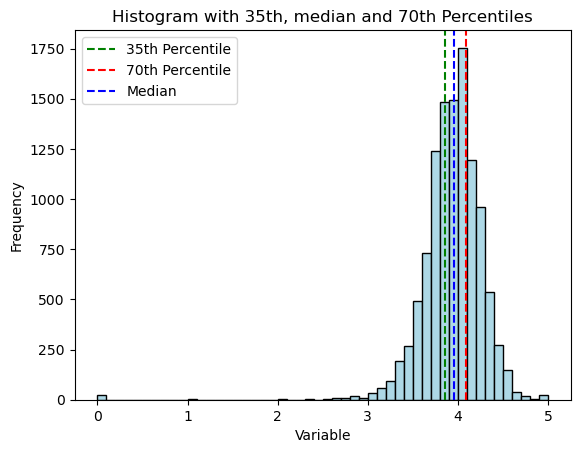

In [23]:
plt.hist(df['average_rating'], bins=50, color='lightblue', edgecolor='black')

# Mark the 35th and 70th percentiles
plt.axvline(percentile_35, color='green', linestyle='--', label='35th Percentile')
plt.axvline(percentile_70, color='red', linestyle='--', label='70th Percentile')
plt.axvline(median_50, color='blue', linestyle='--', label='Median')
# Add labels and title
plt.title('Histogram with 35th, median and 70th Percentiles')
plt.xlabel('Variable')
plt.ylabel('Frequency')
plt.legend()

plt.show()

In [25]:
# Count the occurrences of each unique author and publisher
author_counts = df['authors'].value_counts()
publisher_counts = df['publisher'].value_counts()

# Group by the number of occurrences and count how many authors and publishers fall into each group
author_grouped = author_counts.value_counts().sort_index()
publisher_grouped = publisher_counts.value_counts().sort_index()

print("Authors grouped by counts:")
print(author_grouped)

print("\nPublishers grouped by counts:")
print(publisher_grouped)

Authors grouped by counts:
count
1     2756
2      505
3      238
4      157
5      114
6       71
7       67
8       55
9       44
10      36
11      27
12      18
13      16
14      12
15       7
16      12
17      13
18      10
19      10
20       4
21       3
22       4
23       7
24       1
25       2
26       4
27       2
28       2
29       2
30       3
31       2
33       2
36       1
37       2
39       1
40       2
41       1
43       1
45       1
46       1
51       1
82       1
88       1
Name: count, dtype: int64

Publishers grouped by counts:
count
1      906
2      295
3      127
4       90
5       46
      ... 
154      1
165      1
185      1
333      1
370      1
Name: count, Length: 79, dtype: int64


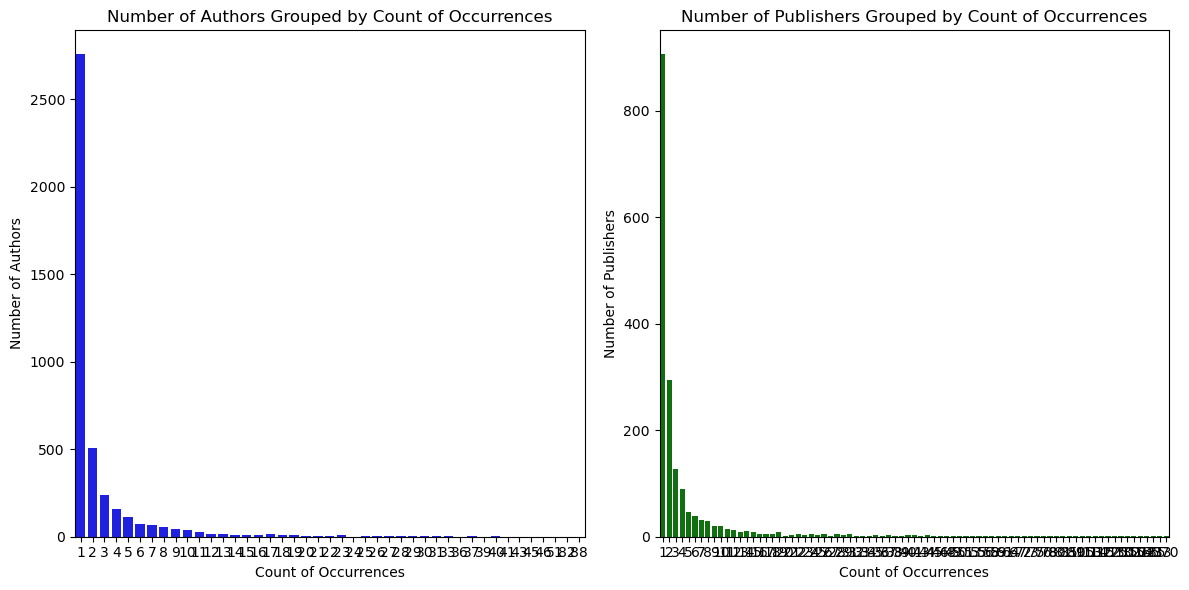

In [27]:
# Create the plot for authors
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # First plot for authors
sns.barplot(x=author_grouped.index, y=author_grouped.values, color='blue')
plt.title('Number of Authors Grouped by Count of Occurrences')
plt.xlabel('Count of Occurrences')
plt.ylabel('Number of Authors')

# Create the plot for publishers
plt.subplot(1, 2, 2)  # Second plot for publishers
sns.barplot(x=publisher_grouped.index, y=publisher_grouped.values, color='green')
plt.title('Number of Publishers Grouped by Count of Occurrences')
plt.xlabel('Count of Occurrences')
plt.ylabel('Number of Publishers')

plt.tight_layout()
plt.show()

In [29]:
authors_up_to_2 = author_counts[author_counts <= 2]
authors_more_than_2 = author_counts[author_counts > 2]

# Separate publishers into two groups: those with up to 2 occurrences and those with more than 2
publishers_up_to_2 = publisher_counts[publisher_counts <= 2]
publishers_more_than_2 = publisher_counts[publisher_counts > 2]

# Get counts of each group
authors_up_to_2_count = len(authors_up_to_2)
authors_more_than_2_count = len(authors_more_than_2)

publishers_up_to_2_count = len(publishers_up_to_2)
publishers_more_than_2_count = len(publishers_more_than_2)

print(f"Authors with up to 2 occurrences: {authors_up_to_2_count}")
print(f"Authors with more than 2 occurrences: {authors_more_than_2_count}")
print(f"Publishers with up to 2 occurrences: {publishers_up_to_2_count}")
print(f"Publishers with more than 2 occurrences: {publishers_more_than_2_count}")

Authors with up to 2 occurrences: 3261
Authors with more than 2 occurrences: 958
Publishers with up to 2 occurrences: 1201
Publishers with more than 2 occurrences: 600


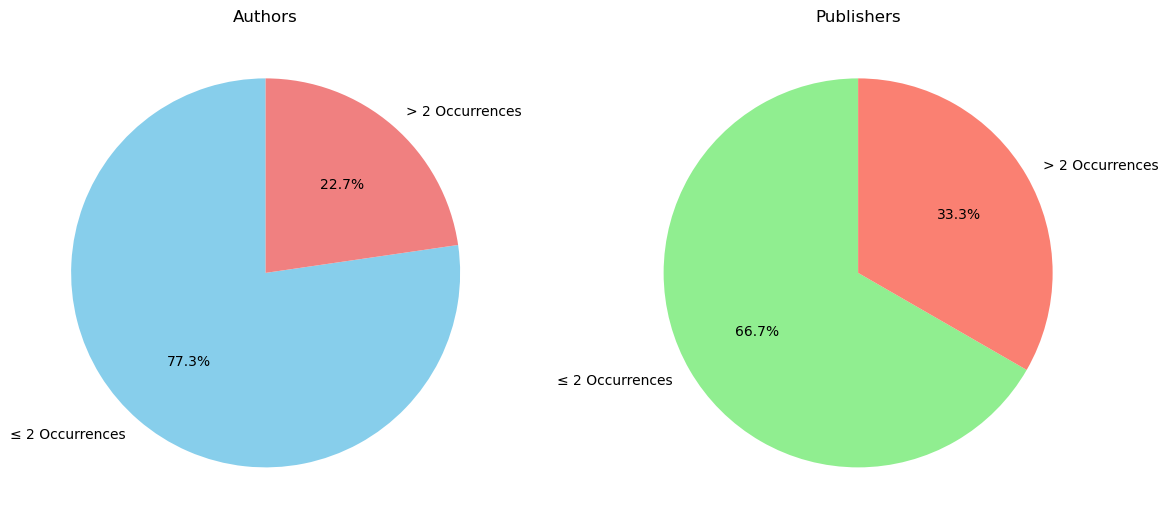

In [29]:
# Pie chart for authors
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie([authors_up_to_2_count, authors_more_than_2_count], labels=['≤ 2 Occurrences', '> 2 Occurrences'], 
        autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
plt.title('Authors')

# Pie chart for publishers
plt.subplot(1, 2, 2)
plt.pie([publishers_up_to_2_count, publishers_more_than_2_count], labels=['≤ 2 Occurrences', '> 2 Occurrences'], 
        autopct='%1.1f%%', colors=['lightgreen', 'salmon'], startangle=90)
plt.title('Publishers')

plt.tight_layout()
plt.show()

In [ ]:
This little amount of accurences represents a real problem when using <target encoding> since we have way too many categories with little sample size that create noise in the models. 
I am going to attempt applying some target encoding techniques that could potentially reduce this phenomenom. 

In [ ]:
pip install category_encoders

In [31]:
import category_encoders as ce

# Create a binary encoder object
encoder = ce.BinaryEncoder(cols=['language_code'])

# Fit and transform the 'language_code' column
df = encoder.fit_transform(df)


print(df.head())

                                    authors  average_rating         isbn13  \
0                           Sam Bass Warner            3.58  9780674842113   
1  David E. Smith (Turgon of TheOneRing.net            3.58  9781593600112   
2                         Bret Easton Ellis            3.46  9782264031914   
3                           Nicholson Baker            3.84  9782264017697   
4                              James Wesley            3.63  9781563841552   

   language_code_0  language_code_1  language_code_2  language_code_3  \
0                0                0                0                0   
1                0                0                0                1   
2                0                0                0                1   
3                0                0                0                1   
4                0                0                0                1   

   language_code_4    num_pages  ratings_count  text_reviews_count  \
0                1    

In [39]:
from category_encoders import TargetEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Categorical columns and target of encoding
categorical_columns = ['authors', 'publisher']
target_for_encoding = 'average_rating'  # Use 'average_rating' to encode

# Step 1: Initialize KFold
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Step 2: Initialize TargetEncoder
encoder = TargetEncoder(cols=categorical_columns)

# Step 3: Create 'rating_class' (classification target) from 'average_rating' in the original DataFrame
df['rating_class'] = pd.cut(df['average_rating'], 
                            bins=[-float('inf'), 3, 4, float('inf')], 
                            labels=[0, 1, 2])

# List to store accuracy results and additional metrics
accuracy_scores = []
precision_list = []
recall_list = []
f1_list = []

# Step 4: Perform cross-validation
for train_index, test_index in kf.split(df):
    # Split data into training and testing sets
    X_train, X_test = df.iloc[train_index], df.iloc[test_index]
    y_train, y_test = df['rating_class'].iloc[train_index], df['rating_class'].iloc[test_index]
    
    # Fit the TargetEncoder on training data using 'average_rating' as the target for encoding
    encoder.fit(X_train[categorical_columns], X_train[target_for_encoding])
    
    # Transform the training and test sets
    X_train_encoded = X_train.copy()
    X_test_encoded = X_test.copy()
    X_train_encoded[categorical_columns] = encoder.transform(X_train[categorical_columns])
    X_test_encoded[categorical_columns] = encoder.transform(X_test[categorical_columns])
    
    # Drop irrelevant columns for the model
    X_train_encoded = X_train_encoded.drop(columns=['average_rating', 'rating_class'])
    X_test_encoded = X_test_encoded.drop(columns=['average_rating', 'rating_class'])
    
    # Initialize Gradient Boosting Classifier
    gbc = GradientBoostingClassifier(random_state=42)
    
    # Train the model on the training set
    gbc.fit(X_train_encoded, y_train)
    
    # Make predictions on the test set
    y_pred = gbc.predict(X_test_encoded)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Calculate precision, recall, f1-score for the test set
    report = classification_report(y_test, y_pred, output_dict=True)
    precision_list.append(report['weighted avg']['precision'])
    recall_list.append(report['weighted avg']['recall'])
    f1_list.append(report['weighted avg']['f1-score'])
    
    # Print classification report for the fold
    print(f"Fold Classification Report:\n{classification_report(y_test, y_pred)}")
    
    # Print confusion matrix for the fold
    print(f"Fold Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

# Output the cross-validated accuracy and other metrics
print("Accuracy Scores for each fold:", accuracy_scores)
print("Average Accuracy:", sum(accuracy_scores) / len(accuracy_scores))

print("Average Precision:", sum(precision_list) / len(precision_list))
print("Average Recall:", sum(recall_list) / len(recall_list))
print("Average F1 Score:", sum(f1_list) / len(f1_list))

Fold Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.69      0.82      0.75      2090
           2       0.69      0.53      0.60      1587

    accuracy                           0.69      3709
   macro avg       0.46      0.45      0.45      3709
weighted avg       0.69      0.69      0.68      3709

Fold Confusion Matrix:
[[   0   30    2]
 [   5 1712  373]
 [   1  738  848]]

Fold Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       0.70      0.82      0.75      2111
           2       0.69      0.54      0.61      1564

    accuracy                           0.69      3709
   macro avg       0.46      0.45      0.45      3709
weighted avg       0.69      0.69      0.68      3709

Fold Confusion Matrix:
[[   0   33    1]
 [   8 1732  371]
 [   1  721  842]]

Fold Classification Repo

In [42]:
# Step 1: Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# redefining the target as a binary target >4 and 4<

df['rating_class'] = pd.cut(df['average_rating'], 
                            bins=[-float('inf'), 4, float('inf')], 
                            labels=[0, 1])

# List to store accuracy results and additional metrics
accuracy_scores = []
precision_list = []
recall_list = []
f1_list = []

# Step 4: Perform cross-validation
for train_index, test_index in kf.split(df):
    # Split data into training and testing sets
    X_train, X_test = df.iloc[train_index], df.iloc[test_index]
    y_train, y_test = df['rating_class'].iloc[train_index], df['rating_class'].iloc[test_index]
    
    # Fit the TargetEncoder on training data using 'average_rating' as the target for encoding
    encoder.fit(X_train[categorical_columns], X_train[target_for_encoding])
    
    # Transform the training and test sets
    X_train_encoded = X_train.copy()
    X_test_encoded = X_test.copy()
    X_train_encoded[categorical_columns] = encoder.transform(X_train[categorical_columns])
    X_test_encoded[categorical_columns] = encoder.transform(X_test[categorical_columns])
    
    # Drop irrelevant columns for the model
    X_train_encoded = X_train_encoded.drop(columns=['average_rating', 'rating_class'])
    X_test_encoded = X_test_encoded.drop(columns=['average_rating', 'rating_class'])
    
    # Initialize Gradient Boosting Classifier
    gbc = GradientBoostingClassifier(random_state=42)
    
    # Train the model on the training set
    gbc.fit(X_train_encoded, y_train)
    
    # Make predictions on the test set
    y_pred = gbc.predict(X_test_encoded)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Calculate precision, recall, f1-score for the test set
    report = classification_report(y_test, y_pred, output_dict=True)
    precision_list.append(report['weighted avg']['precision'])
    recall_list.append(report['weighted avg']['recall'])
    f1_list.append(report['weighted avg']['f1-score'])
    
    # Print classification report for the fold
    print(f"Fold Classification Report:\n{classification_report(y_test, y_pred)}")
    
    # Print confusion matrix for the fold
    print(f"Fold Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

# Output the cross-validated accuracy and other metrics
print("Accuracy Scores for each fold:", accuracy_scores)
print("Average Accuracy:", sum(accuracy_scores) / len(accuracy_scores))

print("Average Precision:", sum(precision_list) / len(precision_list))
print("Average Recall:", sum(recall_list) / len(recall_list))
print("Average F1 Score:", sum(f1_list) / len(f1_list))

Fold Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.82      0.75      1267
           1       0.69      0.52      0.59       959

    accuracy                           0.69      2226
   macro avg       0.69      0.67      0.67      2226
weighted avg       0.69      0.69      0.68      2226

Fold Confusion Matrix:
[[1038  229]
 [ 456  503]]

Fold Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.82      0.77      1296
           1       0.69      0.57      0.63       930

    accuracy                           0.71      2226
   macro avg       0.71      0.69      0.70      2226
weighted avg       0.71      0.71      0.71      2226

Fold Confusion Matrix:
[[1060  236]
 [ 400  530]]

Fold Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.82      0.76      1271
           1       0.69      0.53      0.60       9

In [44]:
print(df.columns)

Index(['authors', 'average_rating', 'isbn13', 'language_code_0',
       'language_code_1', 'language_code_2', 'language_code_3',
       'language_code_4', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher', 'rating_class'],
      dtype='object')


In [46]:
print(df.head(20))

                                     authors  average_rating         isbn13  \
0                            Sam Bass Warner            3.58  9780674842113   
1   David E. Smith (Turgon of TheOneRing.net            3.58  9781593600112   
2                          Bret Easton Ellis            3.46  9782264031914   
3                            Nicholson Baker            3.84  9782264017697   
4                               James Wesley            3.63  9781563841552   
5                           Robert M. Pirsig            3.58  9781403356208   
6                              George Orwell            4.18  9781421808321   
7                          Elizabeth  George            4.10  9780553575101   
8                                Terry Deary            4.40  9780713659894   
9                             Virginia Woolf            4.07  9780156028066   
10                              Philip Dutre            4.50  9781568813073   
11                            Hiromu Arakawa        

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Now 'average_rating' is used for both encoding and target forecast of the model. 
categorical_columns = ['authors', 'publisher']
target = 'average_rating'  # Use 'average_rating' as the target for regression

# Step 1: Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(df, df[target], test_size=0.2, random_state=42)

# Step 2: Initialize TargetEncoder
encoder = TargetEncoder(cols=categorical_columns)

# Step 3: Fit the TargetEncoder on training data using 'average_rating' as the target for encoding
encoder.fit(X_train[categorical_columns], y_train)

# Step 4: Transform the training and test sets
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()
X_train_encoded[categorical_columns] = encoder.transform(X_train[categorical_columns])
X_test_encoded[categorical_columns] = encoder.transform(X_test[categorical_columns])

# Drop irrelevant columns for the model
X_train_encoded = X_train_encoded.drop(columns=['average_rating', 'rating_class'])
X_test_encoded = X_test_encoded.drop(columns=['average_rating', 'rating_class'])

# Step 5: Initialize Linear Regression model
lr = LinearRegression()

# Step 6: Train the model on the training set
lr.fit(X_train_encoded, y_train)

# Step 7: Make predictions on the test set
y_pred = lr.predict(X_test_encoded)

# Step 8: Evaluate the model using MSE and R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the results
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")



MSE: 0.1156
R²: 0.0991


In [ ]:
# I must have something wrong in this code, results are too poor compared to no weighted mean in ' aurhors' and 'publishers' . 
If not worng in the implementation, I  think these results imply that the original enginering of those feature was extremly overfitting the model. #

In [56]:
print(X_train_encoded.head())

        authors         isbn13  language_code_0  language_code_1  \
4001   3.905776  9780060838584                0                0   
10605  3.952669  9780802789471                0                0   
6606   3.942332  9780140449082                0                0   
7889   3.950067  9780679886181                0                0   
5391   3.969583  9780786848935                0                0   

       language_code_2  language_code_3  language_code_4    num_pages  \
4001                 0                1                0          399   
10605                0                1                0           32   
6606                 0                1                0          716   
7889                 0                1                0          112   
5391                 0                1                0           40   

       ratings_count  text_reviews_count  publication_date  publisher  
4001          190039                4922             38538   3.897782  
10605   

In [73]:
from sklearn.metrics import precision_score, recall_score

# Define a threshold
threshold = 4

# Convert regression predictions and true values to binary classification
y_train_pred = lr.predict(X_train_encoded)
y_train_binary = (y_train >= threshold).astype(int)
y_train_pred_binary = (y_train_pred >= threshold).astype(int)

y_test_pred = lr.predict(X_test_encoded)
y_test_binary = (y_test >= threshold).astype(int)
y_test_pred_binary = (y_test_pred >= threshold).astype(int)

# Calculate precision and recall
precision_train = precision_score(y_train_binary, y_train_pred_binary)
recall_train = recall_score(y_train_binary, y_train_pred_binary)

precision_test = precision_score(y_test_binary, y_test_pred_binary)
recall_test = recall_score(y_test_binary, y_test_pred_binary)

print(f"Training Precision: {precision_train}")
print(f"Training Recall: {recall_train}")
print(f"Test Precision: {precision_test}")
print(f"Test Recall: {recall_test}")


Training Precision: 0.8462325264234573
Training Recall: 0.6278775613458133
Test Precision: 0.7168141592920354
Test Recall: 0.4045954045954046


In [51]:
#This are the results from the initial model run by simply applying the average score unadultered. If you run it now it will give you error!

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [53]:
y_pred = model.predict(X_test)

In [55]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [57]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 Score): {r2}")

# Optional: Displaying the coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Mean Squared Error (MSE): 0.030707780548975466
R-squared (R2 Score): 0.7592980701816194
Intercept: -0.3771229480817153
Coefficients: [ 7.79782895e-17  3.00861705e-02  1.66810186e-03  2.04536927e-02
  1.20558069e-02  8.79253722e-03  1.40430882e-04 -1.37062272e-08
  2.81573808e-06 -3.07266988e-06  2.33138707e-01  8.75931171e-01]


In [59]:
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(model.score(X_test, y_test)))

Variance score: 0.7592980701816194


In [61]:
from sklearn.metrics import precision_score, recall_score

# Define a threshold
threshold = 4

# Convert regression predictions and true values to binary classification
y_train_pred = model.predict(X_train)
y_train_binary = (y_train >= threshold).astype(int)
y_train_pred_binary = (y_train_pred >= threshold).astype(int)

y_test_pred = model.predict(X_test)
y_test_binary = (y_test >= threshold).astype(int)
y_test_pred_binary = (y_test_pred >= threshold).astype(int)

# Calculate precision and recall
precision_train = precision_score(y_train_binary, y_train_pred_binary)
recall_train = recall_score(y_train_binary, y_train_pred_binary)

precision_test = precision_score(y_test_binary, y_test_pred_binary)
recall_test = recall_score(y_test_binary, y_test_pred_binary)

print(f"Training Precision: {precision_train}")
print(f"Training Recall: {recall_train}")
print(f"Test Precision: {precision_test}")
print(f"Test Recall: {recall_test}")


Training Precision: 0.8510981912144703
Training Recall: 0.7609009529309847
Test Precision: 0.8457639391745112
Test Recall: 0.7833668678739101
